In [2]:
import cv2

In [3]:
img_1 = cv2.imread('guilty_crown_129-1024x574.jpg')
img_2 = cv2.imread('maxresdefault.jpg')

In [ ]:
# 画像を表示
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 反転
img = cv2.flip(img, 1)

# 画像を表示
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# 白黒
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 画像を表示
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
size = 224

# 画像サイズ変更
img = cv2.resize(img, (size, size))

# 画像を表示
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# サイズを統一
img_2 = cv2.resize(img_2, img_1.shape[1::-1])

# 重ねる
img = cv2.addWeighted(img_1, 0.5, img_2, 0.5, 0)

# 画像を表示
cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [12]:
def Face_Cut(img):
    
    img = cv2.imread('guilty_crown_129-1024x574.jpg')
    
    cascade_path = '/Users/makidaisuke/Desktop/my pands/画像認識/data/haarcascades/haarcascade_frontalface_alt.xml'
    cascade = cv2.CascadeClassifier(cascade_path)
    
    #　画像を白黒にする
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    face_list = cascade.detectMultiScale(gray,
                                                                   scaleFactor = 1.11,
                                                                   minNeighbors = 5,
                                                                   minSize = (128, 128),
                                                                   flags = cv2.CASCADE_SCALE_IMAGE)

    color = (0, 0, 255)
    
    # 顔を認識した場合
    if len(face_list) > 0:

        for face in face_list:
            x, y, w, h = face
            cv2.rectangle(img, (x, y), (x+w, y+h), color, thickness=2)
    
    cv2.imwrite('after.jpg', img)
    return img

In [4]:
def search_cv2_cascade(castom_cascade_path="data"):
    from os.path import splitext, basename, join, dirname, isdir, isfile
    from glob import glob
    import cv2

    cv2_path = dirname(str(cv2).split()[-1].strip(">").strip("'"))
    cascade_dir_path = join(cv2_path, castom_cascade_path)
    if isdir(cascade_dir_path):
        cascade_xml_path_list = join(cascade_dir_path, "*.xml")
        cascade = {splitext(basename(path))[0][12:]:path for path in glob(cascade_xml_path_list)}
        return cascade
    else:
        return False

True

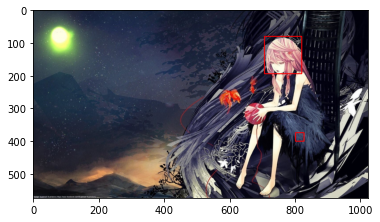

In [5]:
import matplotlib.pyplot as plt

src = cv2.imread("/Users/makidaisuke/Desktop/my pands/画像認識/guilty_crown_129-1024x574.jpg")

cv2_img = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

color = (0, 0, 255)

face_cascade = cv2.CascadeClassifier(search_cv2_cascade()["frontalface_default"])

facerect = face_cascade.detectMultiScale(cv2_img, scaleFactor=1.1, minNeighbors=1, minSize=(1, 1))

#1つ以上囲む部分があれば元の画像に矩形を付け足す
if len(facerect) > 0:
    #検出した顔を囲む矩形の作成
    for rect in facerect:
        cv2.rectangle(src, tuple(rect[0:2]),tuple(rect[0:2]+rect[2:4]), color, thickness=2)
#結果をmatplotlibで表示
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
#保存
cv2.imwrite("detected.jpg", src)